In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## サンプル平均をとってゆらぎを少なくする

In [3]:
#転移点でのデータ MCMC
data_2021 = np.loadtxt(f"../output/L40/seed2021/Energy_Magnetization_L40_T2.49_2021.dat")
data_2022 = np.loadtxt(f"../output/L40/seed2022/Energy_Magnetization_L40_T2.49_2022.dat")
data_2023 = np.loadtxt(f"../output/L40/seed2023/Energy_Magnetization_L40_T2.49_2023.dat")
data_2024 = np.loadtxt(f"../output/L40/seed2024/Energy_Magnetization_L40_T2.49_2024.dat")
data_2025 = np.loadtxt(f"../output/L40/seed2025/Energy_Magnetization_L40_T2.49_2025.dat")

In [142]:
data_2028 = np.loadtxt("../output/L40/seed2028/Energy_Magnetization_L40_T2.49_2028.dat")
mag_2028 = data_2028[:, 1]

In [4]:
mag_2021 = data_2021[:, 1]
mag_2022 = data_2022[:, 1]
mag_2023 = data_2023[:, 1]
mag_2024 = data_2024[:, 1]
mag_2025 = data_2025[:, 1]

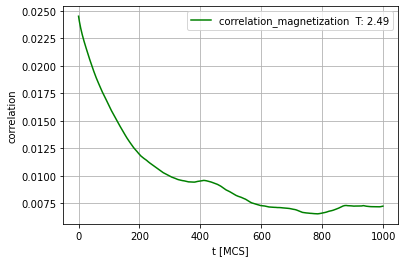

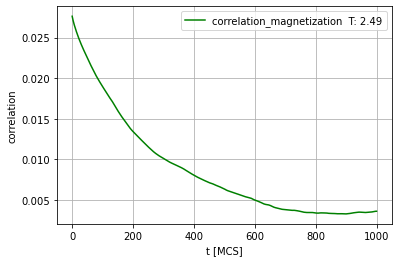

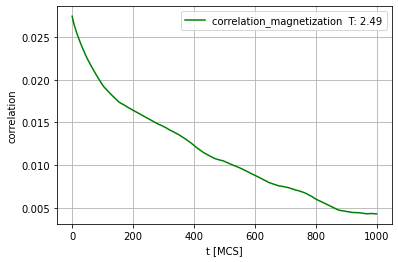

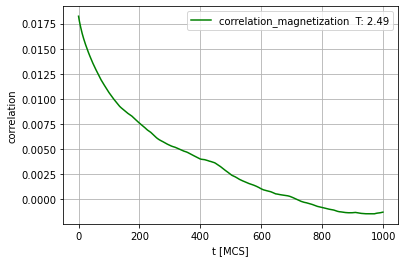

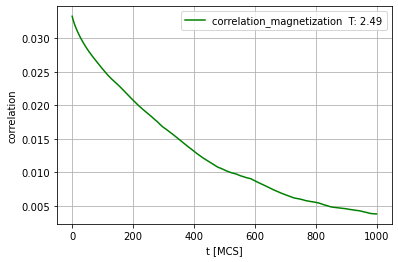

In [6]:
#正しい計算結果
Correlation_mags = []
for mag in [mag_2021, mag_2022,mag_2023 , mag_2024, mag_2025]:
    mag_ = mag[200:]
    C = np.zeros(2000)
    sum2 = (np.mean(mag_))**2
    for t in range(2000):
        sum1 = 0
        N = mag_.shape[0]
        for t_ in range(N-t):
            sum1 += mag_[t_] * mag_[t_ + t]
        C[t] = (sum1 / (N-t)) - sum2
    Correlation_mags.append(C)

    
    plt.plot(C[:1000], label="correlation_magnetization  T: 2.49", color='green')
    plt.legend()
    plt.xlabel('t [MCS]')
    plt.ylabel('correlation')
    plt.grid()
    plt.show()

In [5]:
mag_array = np.array(Correlation_mags)
mag_array.shape
C_mcmc = np.mean(mag_array, axis=0)

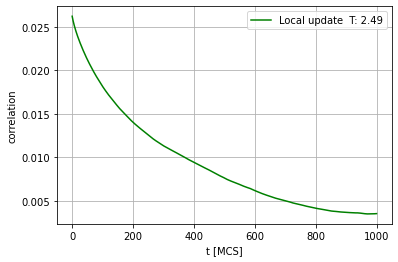

In [6]:
plt.plot(C_mcmc[:1000], label="Local update  T: 2.49", color='green')
plt.legend()
plt.xlabel('t [MCS]')
plt.ylabel('correlation')
plt.grid()
plt.show()

In [7]:
data_sl_2021 = np.loadtxt('../output/L40/seed2021_SLMC/energy_mag_2021_2.49.dat')
data_sl_2022 = np.loadtxt('../output/L40/seed2022_SLMC/energy_mag_1900_2.49.dat')
data_sl_2023 = np.loadtxt('../output/L40/seed2023_SLMC/energy_mag_2023_2.49.dat')
data_sl_2024 = np.loadtxt('../output/L40/seed2024_SLMC/energy_mag_2024_2.49.dat')
data_sl_2025 = np.loadtxt('../output/L40/seed2025_SLMC/energy_mag_2025_2.49.dat')
mag_sl_2021 = data_sl_2021[:, 1]
mag_sl_2022 = data_sl_2022[:, 1]
mag_sl_2023 = data_sl_2023[:, 1]
mag_sl_2024 = data_sl_2024[:, 1]
mag_sl_2025 = data_sl_2025[:, 1]

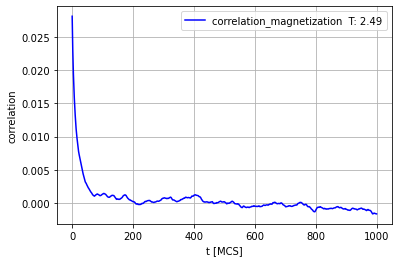

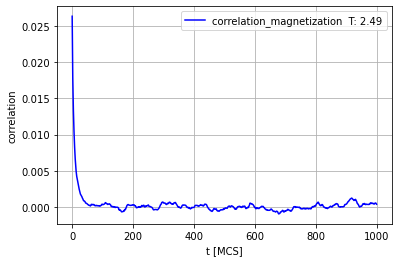

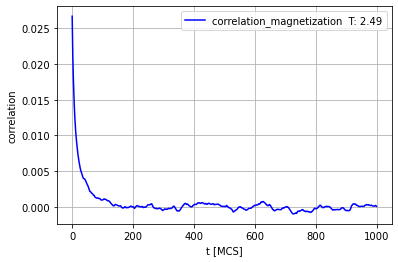

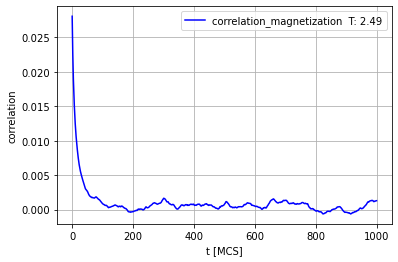

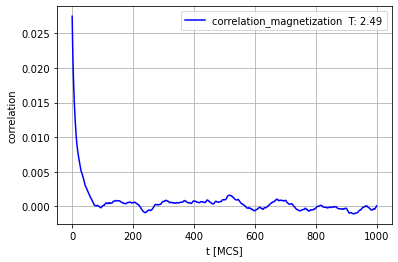

In [8]:
#正しい計算結果
Correlation_mags_sl = []
for mag in [mag_sl_2021, mag_sl_2022,mag_sl_2023 , mag_sl_2024, mag_sl_2025]:
    mag_ = mag[200:]
    C_sl = np.zeros(2000)
    sum2 = (np.mean(mag_))**2
    for t in range(2000):
        sum1 = 0
        N = mag_.shape[0]
        for t_ in range(N-t):
            sum1 += mag_[t_] * mag_[t_ + t]
        C_sl[t] = (sum1 / (N-t)) - sum2
    Correlation_mags_sl.append(C_sl)
    
    
    plt.plot(C_sl[:1000], label="correlation_magnetization  T: 2.49", color='blue')
    plt.legend()
    plt.xlabel('t [MCS]')
    plt.ylabel('correlation')
    plt.grid()
    plt.show()
    
    

In [55]:
mag_array_sl = np.array(Correlation_mags_sl)
C_sl = np.mean(mag_array_sl, axis=0)

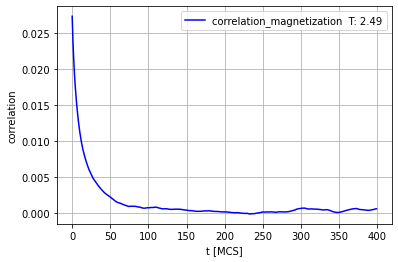

In [56]:
plt.plot(C_sl[:400], label="correlation_magnetization  T: 2.49", color='blue')
plt.legend()
plt.xlabel('t [MCS]')
plt.ylabel('correlation')
plt.grid()
plt.show()

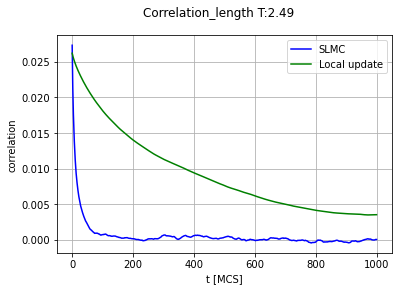

In [57]:
plt.plot(C_sl[:1000], label="SLMC", color='blue')
plt.plot(C_mcmc[:1000], label="Local update", color='green')
plt.legend()
plt.xlabel('t [MCS]')
plt.ylabel('correlation')
plt.suptitle('Correlation_length T:2.49')
plt.grid()
plt.show()

## 緩和時間を見積もる

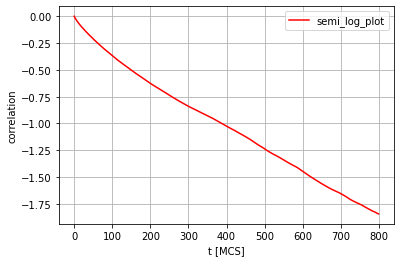

In [17]:
plt.plot(np.log(C_mcmc[:800]/C_mcmc[0]), label=f"semi_log_plot", color='red')
plt.legend()
plt.xlabel('t [MCS]')
plt.ylabel('correlation')
plt.grid()
plt.show()

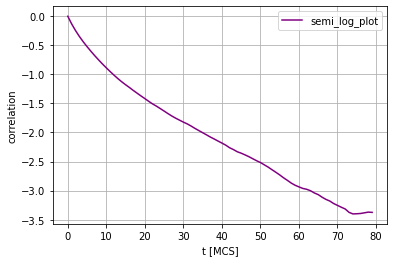

In [58]:
plt.plot(np.log(C_sl[:80]/C_sl[0]), label=f"semi_log_plot", color='purple')
plt.legend()
plt.xlabel('t [MCS]')
plt.ylabel('correlation')
plt.grid()
plt.show()

In [15]:
from scipy.optimize import curve_fit

In [28]:
def func(x, a):
    return -(1/a)*x

In [32]:
x_data= np.arange(800)
y_data = np.log(C_mcmc[:800]/C_mcmc[0])
popt, pcov = curve_fit(func, x_data[1:], y_data[1:])
print ('τ:', popt.round(2))

τ: [408.14]


In [59]:
x_data_sl = np.arange(10, 71)
y_data_sl = np.log(C_sl[10:71]/C_mcmc[0])
popt, pcov = curve_fit(func, x_data_sl, y_data_sl)
print ('τ:', popt.round(2))

τ: [19.8]
